In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load json file 
import json
with open('kernel_evaluation_results_effnet.json', 'r') as f:
    results = json.load(f)
#print results
print(results)


[{'model': 'convnextv2_base', 'mean_accuracy': 65.08885955810547, 'mean_mse': 0.8638585805892944, 'accuracies': [74.36871337890625, 49.38406753540039, 76.05477905273438, 78.0450439453125, 77.30465698242188, 77.52243041992188, 49.848777770996094, 74.57052612304688, 75.56440734863281, 75.9574966430664, 51.773624420166016, 51.48728942871094, 77.59371948242188, 75.01116943359375, 76.90103912353516, 50.560569763183594, 74.33708190917969, 74.94981384277344, 50.518558502197266, 50.3403205871582, 76.86894989013672, 52.64155960083008, 75.67926025390625, 50.247798919677734, 51.82795715332031, 51.501216888427734, 49.362525939941406, 75.10066986083984, 75.73991394042969, 78.0696029663086, 77.75354766845703, 54.26211929321289, 76.62422943115234, 75.0, 75.06123352050781, 49.698299407958984, 76.71475982666016, 74.45896911621094, 50.31619644165039, 55.97797775268555, 52.371917724609375, 52.399024963378906, 51.18819808959961, 50.38230514526367, 77.90849304199219, 75.64469909667969, 51.778873443603516, 

In [3]:
# make into dataframe
# Convert results to a DataFrame
df = pd.DataFrame()

# Extract data from each result
for result in results:
    # Create a temporary DataFrame for this result
    temp_df = pd.DataFrame({
        'model': result['model'],
        'mean_accuracy': result['mean_accuracy'],
        #'mean_mse': result['mean_mse'],
        'accuracies': [result['accuracies']]
    }, index=[0])
    
    # Append to the main DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
df.head()

,model,mean_accuracy,accuracies
0,convnextv2_base,65.088860,"[74.36871337890625, 49.38406753540039, 76.0547..."
1,wide_resnet101_2,72.186798,"[77.05027770996094, 63.974815368652344, 78.484..."
2,deit_small_patch16_224,59.829521,"[75.41899108886719, 37.88666915893555, 77.2255..."
3,regnety_032,68.439590,"[74.94972229003906, 58.7188606262207, 76.07687..."
4,deit_tiny_patch16_224,57.790886,"[77.96648406982422, 27.894880294799805, 81.047..."


In [4]:
# Sort the dataframe by mean_accuracy in ascending order (lowest first)
df = df.sort_values(by='mean_accuracy', ascending=True)

to_drop = ['inception_next_small', 'inception_next_atto']
df = df[~df['model'].isin(to_drop)]
df

,model,mean_accuracy,accuracies
4,deit_tiny_patch16_224,57.790886,"[77.96648406982422, 27.894880294799805, 81.047..."
2,deit_small_patch16_224,59.829521,"[75.41899108886719, 37.88666915893555, 77.2255..."
11,pvt_v2_b2,60.961380,"[74.63687133789062, 40.67889404296875, 76.2314..."
25,resnet34,60.965424,"[73.49720764160156, 43.30686950683594, 74.9282..."
32,resnet18,61.211899,"[73.47486114501953, 44.12811279296875, 75.1049..."
20,beit_base_patch16_224,62.856178,"[74.8379898071289, 45.633724212646484, 76.1873..."
27,convnext_small,63.208618,"[75.06145477294922, 45.661102294921875, 77.159..."
28,vit_base_patch16_224,63.287613,"[73.4525146484375, 48.37120056152344, 75.56880..."
5,mixer_b16_224,63.322067,"[73.63128662109375, 48.45332717895508, 75.8780..."
26,swin_tiny_patch4_window7_224,63.414986,"[73.83240509033203, 47.85108184814453, 75.8117..."


In [5]:
# Calculate variance of accuracies and add to dataframe
df['acc_var'] = df['accuracies'].apply(np.var)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


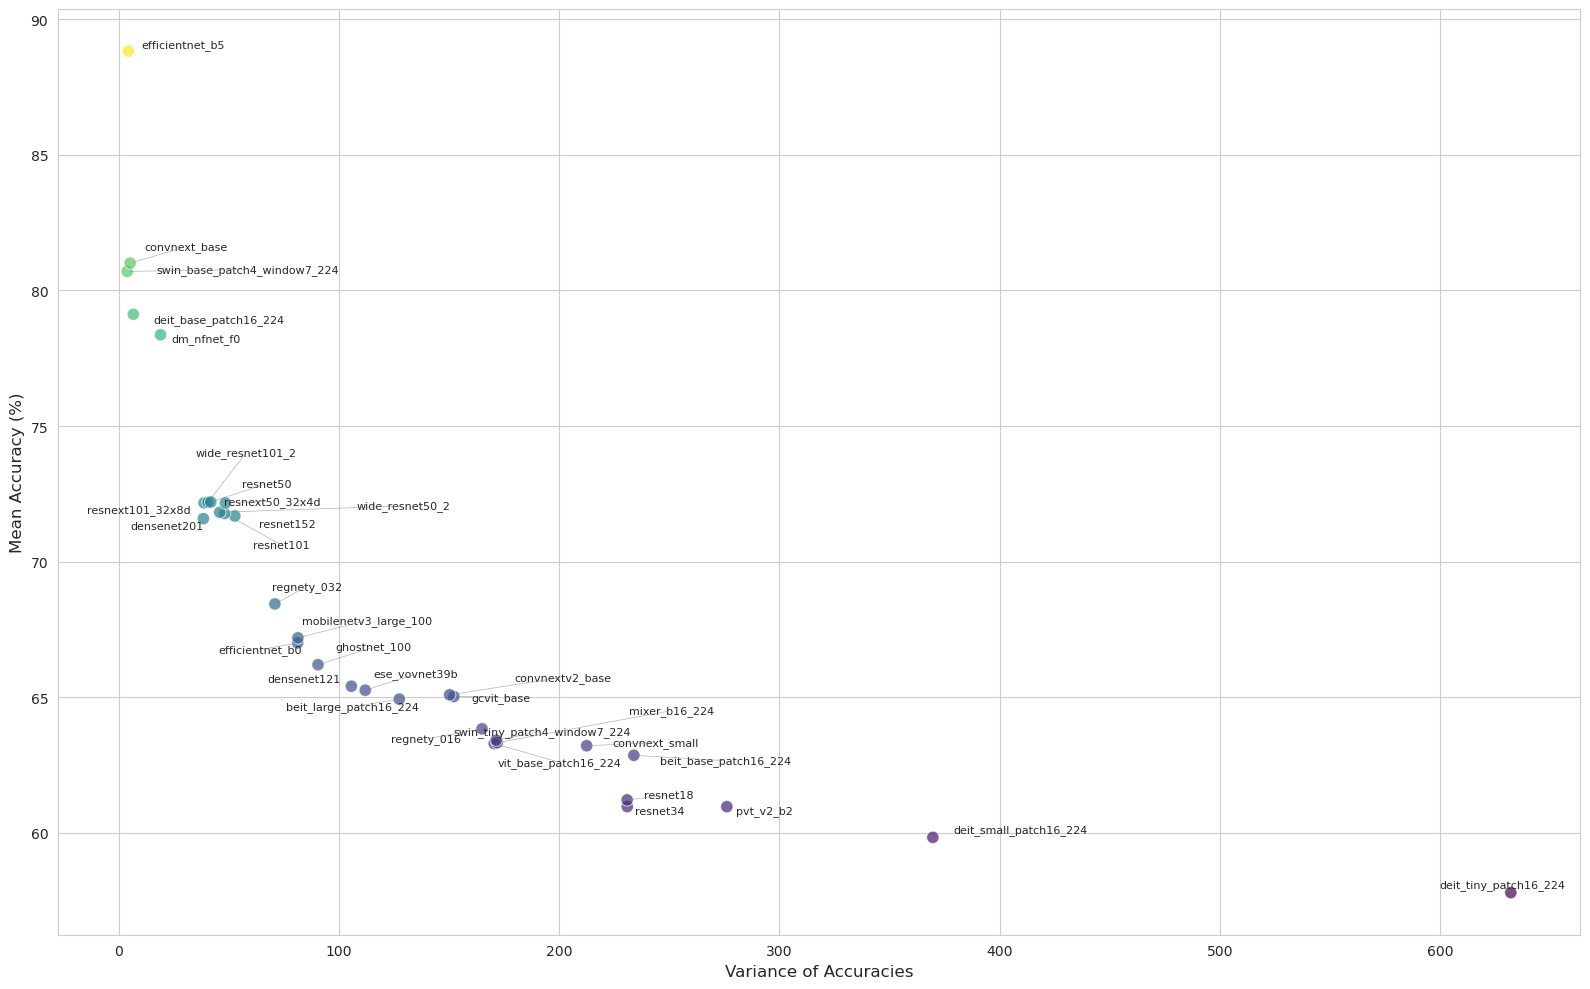

In [6]:
# PLOT 1

import seaborn as sns
import numpy as np
from adjustText import adjust_text

# Set the style
sns.set_style("whitegrid")

# Create figure with larger size for better label spacing
plt.figure(figsize=(16, 10))

# Create scatter plot with seaborn
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=80,  # Point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis'
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=8))

# Adjust text positions to minimize overlap with more iterations and force
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5),
            force_text=(0.5, 0.8),
            force_objects=(0.5, 0.5),
            lim=500)  # More iterations for better placement

# Add title and labels with better formatting
#plt.title('Model Performance: Mean Accuracy vs. Variance', fontsize=14, fontweight='bold')
plt.xlabel('Variance of Accuracies', fontsize=12)
plt.ylabel('Mean Accuracy (%)', fontsize=12)

# Remove the legend for the hue parameter (it's redundant with y-axis)
plt.legend([],[], frameon=False)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

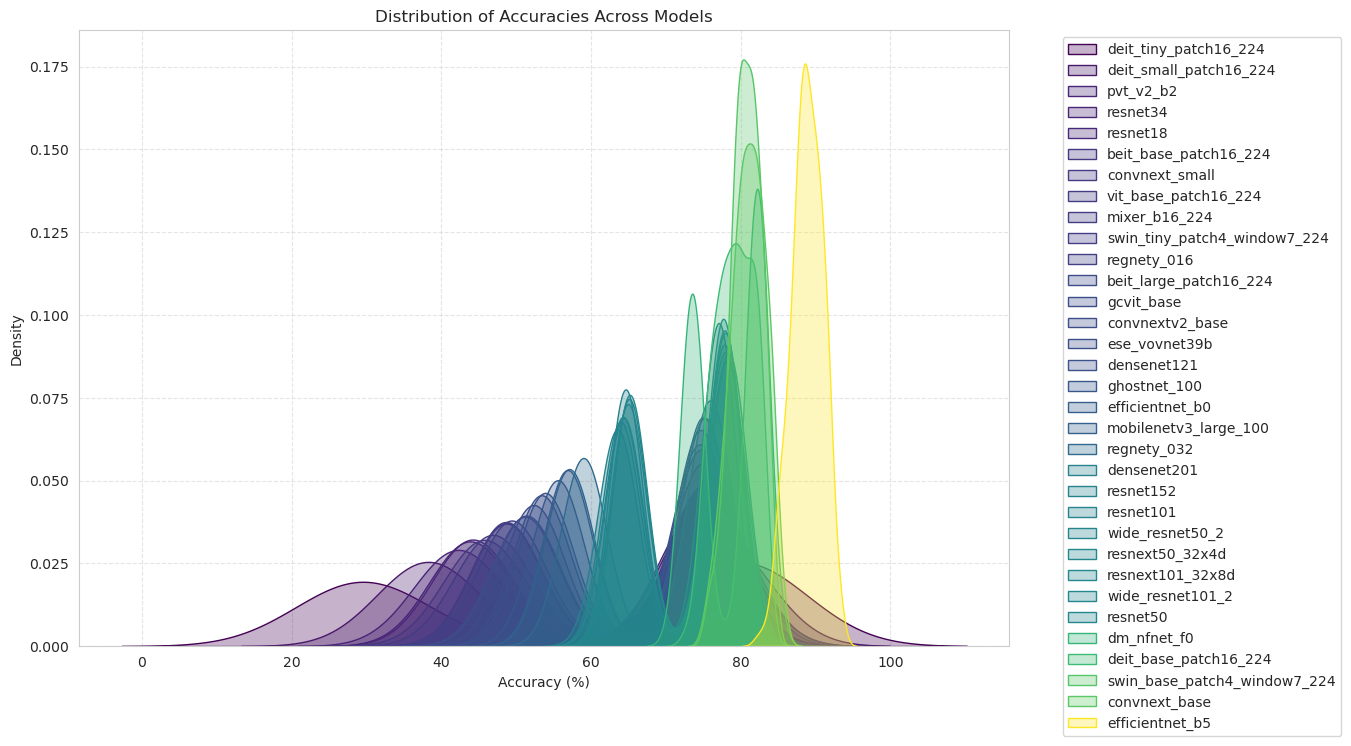

In [ ]:
# PLOT 2

# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np

# Create a figure
plt.figure(figsize=(12, 8))

# Get colormap
cmap = cm.viridis

# Get min and max accuracy for normalization
min_acc = df['mean_accuracy'].min()
max_acc = df['mean_accuracy'].max()

# Plot KDE for each model's accuracies
for i, row in df.iterrows():
    model_name = row['model']
    accuracies = row['accuracies']
    mean_acc = row['mean_accuracy']
    
    # Normalize mean accuracy to 0-1 range for color mapping
    norm_acc = (mean_acc - min_acc) / (max_acc - min_acc)
    color = cmap(norm_acc)
    
    # Create KDE plot with color based on mean accuracy
    sns.kdeplot(accuracies, label=model_name, fill=True, alpha=0.3, color=color)

# Add title and labels
plt.title('Distribution of Accuracies Across Models')
plt.xlabel('Accuracy (%)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add colorbar to show mean accuracy scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(min_acc, max_acc))
sm.set_array([])
cbar = plt.colorbar(sm, label='Mean Accuracy (%)')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_7589/1677564928.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


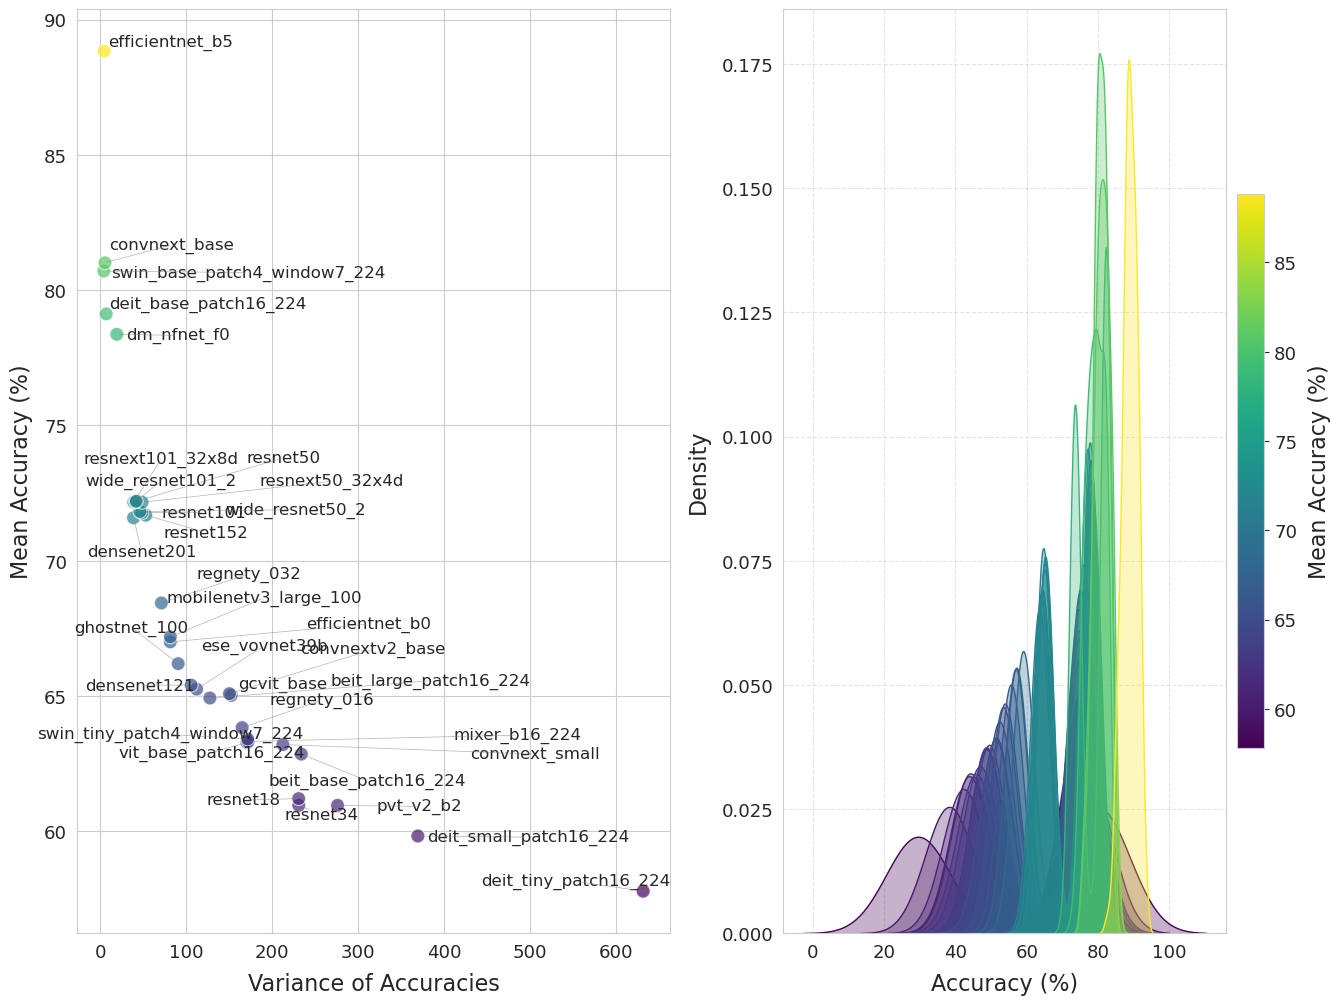

In [12]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [1, .9], 'wspace': 0.2})

# Set global font size for all text elements (a bit smaller than before)
plt.rcParams.update({'font.size': 15})

# Get colormap
cmap = cm.viridis

# Get min and max accuracy for normalization
min_acc = df['mean_accuracy'].min()
max_acc = df['mean_accuracy'].max()
norm = plt.Normalize(min_acc, max_acc)

# PLOT 1 (Left): Scatter plot
sns.set_style("whitegrid")

# Create scatter plot with seaborn on the first axis
scatter = sns.scatterplot(
    data=df,
    x='acc_var',
    y='mean_accuracy',
    alpha=0.7,
    s=100,  # Slightly smaller point size
    hue='mean_accuracy',  # Color by accuracy
    palette='viridis',
    ax=ax1,
    legend=False  # Remove legend, handled below
)

# Add labels for all models
texts = []
for i, row in df.iterrows():
    texts.append(ax1.text(row['acc_var'], row['mean_accuracy'], row['model'], fontsize=12))

# Adjust text positions to minimize overlap
adjust_text(
    texts, 
    arrowprops=dict(arrowstyle='-', color='gray', alpha=0.6, lw=0.5),
    expand_points=(1.5, 1.5),
    force_points=(0.5, 0.5),
    force_text=(0.5, 0.8),
    force_objects=(0.5, 0.5),
    lim=500,
    ax=ax1
)

# Add title and labels with slightly smaller font (not bold)
#ax1.set_title('Model Performance: Mean Accuracy vs. Variance', fontsize=18)
ax1.set_xlabel('Variance of Accuracies', fontsize=16, labelpad=8)
ax1.set_ylabel('Mean Accuracy (%)', fontsize=16, labelpad=8)
ax1.tick_params(axis='both', which='major', labelsize=13)

# Remove the legend for the hue parameter (it's redundant with y-axis)
ax1.legend([], [], frameon=False)

# PLOT 2 (Right): KDE plot
# Plot KDE for each model's accuracies on the second axis
for i, row in df.iterrows():
    model_name = row['model']
    accuracies = row['accuracies']
    mean_acc = row['mean_accuracy']
    
    # Use the same normalization as in the scatter plot
    color = cmap(norm(mean_acc))
    
    # Create KDE plot with color based on mean accuracy
    sns.kdeplot(accuracies, label=model_name, fill=True, alpha=0.3, color=color, ax=ax2)

# Add title and labels with slightly smaller font (not bold)
#ax2.set_title('Distribution of Accuracies Across Models', fontsize=18)
ax2.set_xlabel('Accuracy (%)', fontsize=16, labelpad=8)
ax2.set_ylabel('Density', fontsize=16, labelpad=8)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.grid(True, linestyle='--', alpha=0.5)

# Add legend (optional, uncomment if needed)
#ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add colorbar to show mean accuracy scale
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# Position the colorbar on the right side of the figure
cbar = fig.colorbar(sm, ax=ax2, label='Mean Accuracy (%)', pad=0.02, shrink=0.6)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Mean Accuracy (%)', fontsize=16, labelpad=8)

# Improve layout
plt.tight_layout()

# Save the plot as PDF
plt.savefig('model_performance_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
df['model'] = df['model'] + "_8192"

In [ ]:
#df['model'] = df['model'].str.replace('_8192', '')

In [ ]:
df['model'] = "K_" + df['model']

In [ ]:
df['model'].values

array(['deit_tiny_patch16_224', 'deit_small_patch16_224', 'pvt_v2_b2',
       'resnet34', 'resnet18', 'beit_base_patch16_224', 'convnext_small',
       'vit_base_patch16_224', 'mixer_b16_224',
       'swin_tiny_patch4_window7_224', 'regnety_016',
       'beit_large_patch16_224', 'gcvit_base', 'convnextv2_base',
       'ese_vovnet39b', 'densenet121', 'ghostnet_100', 'efficientnet_b0',
       'mobilenetv3_large_100', 'regnety_032', 'densenet201', 'resnet152',
       'resnet101', 'wide_resnet50_2', 'resnext50_32x4d',
       'resnext101_32x8d', 'wide_resnet101_2', 'resnet50', 'dm_nfnet_f0',
       'deit_base_patch16_224', 'swin_base_patch4_window7_224',
       'convnext_base', 'efficientnet_b5'], dtype=object)

In [ ]:
df['mean_accuracy'].values

array([57.79088593, 59.82952118, 60.96138   , 60.96542358, 61.2118988 ,
       62.85617828, 63.20861816, 63.28761292, 63.32206726, 63.41498566,
       63.83324432, 64.92811584, 65.0249939 , 65.08885956, 65.25717926,
       65.40444946, 66.19694519, 67.00268555, 67.18942261, 68.43959045,
       71.58625793, 71.6837616 , 71.7747345 , 71.82046509, 72.16220093,
       72.16519928, 72.1867981 , 72.19929504, 78.36734009, 79.12139893,
       80.704422  , 81.01097107, 88.83001709])

In [ ]:
df['acc_var'].values

array([632.11882424, 369.68042915, 276.12709021, 230.92837963,
       230.86740236, 233.90708279, 212.48722309, 170.50046497,
       171.89950712, 171.44990519, 164.98461173, 127.42224255,
       152.19137527, 150.22586249, 111.95788137, 105.64870991,
        90.49537899,  81.2927986 ,  81.37823127,  70.92459899,
        38.45466723,  52.72400468,  48.06554259,  45.87425862,
        48.4695183 ,  38.75932142,  40.56234485,  41.81197057,
        19.0132818 ,   6.65209361,   3.86893889,   5.2107294 ,
         4.3978428 ])